In [1]:
#Required imports and reading the data

import pandas as pd

pd.options.mode.chained_assignment = None


# df = pd.read_csv(.\Desktop\bankloans.csv")
df = pd.read_csv("./bankloans.csv")
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [2]:
#Cleaning the data

df = df.drop_duplicates()
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [3]:
df = df.dropna()
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [4]:
df.loc[:, 'age'] = df['age'].astype(int)
df.loc[:, 'income'] = df['income'].astype(float)
df.loc[:, 'default'] = df['default'].apply(lambda x: 1 if x == 1 else 0)
df
import warnings
warnings.filterwarnings('ignore')

C:\Users\sh\AppData\Local\Temp\ipykernel_740\316259647.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'age'] = df['age'].astype(int)
C:\Users\sh\AppData\Local\Temp\ipykernel_740\316259647.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income'] = df['income'].astype(float)
C:\Users\sh\AppData\Local\Temp\ipykernel_740\316259647.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.colum

In [5]:
#Describe the Data

df[['age', 'income', 'default']].describe()

,age,income,default
count,700.000000,700.000000,700.000000
mean,34.860000,45.601429,0.261429
std,7.997342,36.814226,0.439727
min,20.000000,14.000000,0.000000
25%,29.000000,24.000000,0.000000
50%,34.000000,34.000000,0.000000
75%,40.000000,55.000000,1.000000
max,56.000000,446.000000,1.000000


In [6]:
#Calculate Mean

df.groupby('default')[['age', 'income']].mean()

,age,income
default,,
0,35.514507,47.154739
1,33.010929,41.213115


In [7]:
#Median

df.groupby('default')[['age', 'income']].median()

,age,income
default,,
0,35.0,36.0
1,31.0,29.0


In [8]:
#Correlation between Loan default and incomes

df[['default', 'income']].corr()

,default,income
default,1.00000,-0.07097
income,-0.07097,1.00000


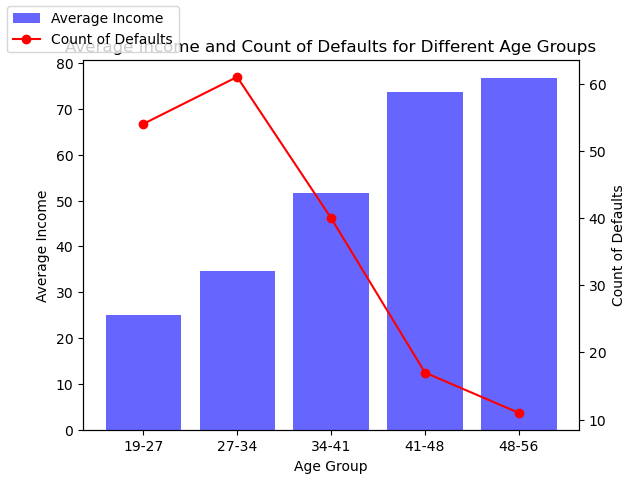

In [9]:
#Analysis Using Charts
#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

df.loc[:, 'age_group'] = pd.cut(df['age'], 5)
df.loc[:, 'age_group'] = df['age_group'].apply(lambda x: f"{int(x.left)}-{int(x.right)}")


grouped = df.groupby('age_group').agg({'income':'mean', 'default':'sum'}).reset_index()
fig, ax1 = plt.subplots()

# Plot the average income
income = ax1.bar(grouped['age_group'].astype(str), grouped['income'], color='b', alpha=0.6)
ax1.set_ylabel('Average Income')
ax1.set_xlabel('Age Group')

# Create a second y-axis for the count of defaults
ax2 = ax1.twinx()
defaults = ax2.plot(grouped['age_group'].astype(str), grouped['default'], color='r', marker='o')
ax2.set_ylabel('Count of Defaults')

# Add a legend
fig.legend([income, defaults[0]], ['Average Income', 'Count of Defaults'], loc='upper left')

# Set the title
plt.title('Average Income and Count of Defaults for Different Age Groups')

plt.show()

import warnings
warnings.filterwarnings('ignore')

1. Age Group: "19-27"
   - Mean Income: $25,029.197
   - Total Defaults: 54

2. Age Group: "27-34"
   - Mean Income: $34,723.214
   - Total Defaults: 61

3. Age Group: "34-41"
   - Mean Income: $51,638.191
   - Total Defaults: 40

4. Age Group: "41-48"
   - Mean Income: $73,715.686
   - Total Defaults: 17

5. Age Group: "48-56"
   - Mean Income: $76,815.789
   - Total Defaults: 11

- As age increases, the mean income tends to increase. This is evident from the ascending order of mean income values across different age groups.

- The total number of defaults generally decreases with age. The "48-56" age group has the lowest number of defaults (11), while the "19-27" age group has the highest number of defaults (54).


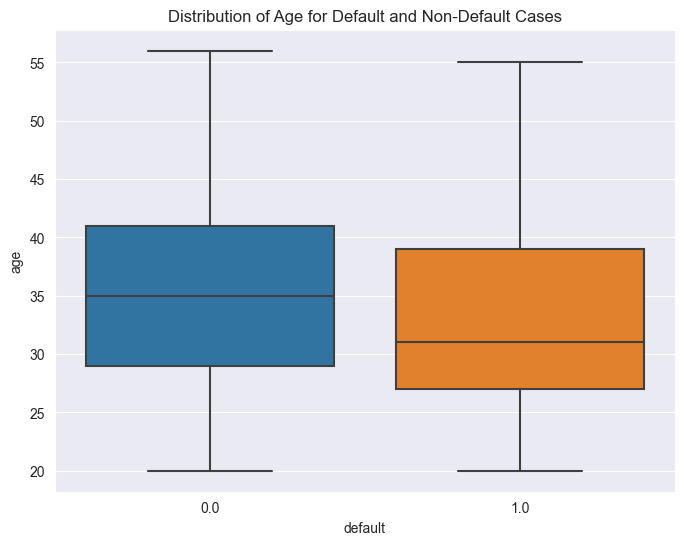

In [10]:
#BoxPlot Comparing Default and Non Default

plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='age', data=df)
plt.title('Distribution of Age for Default and Non-Default Cases')
plt.show()

- mean age for default==0: 35
- mean age for default==1: 33

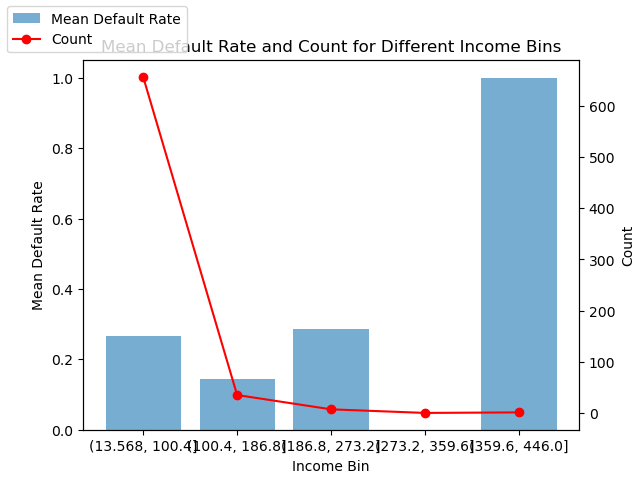

In [13]:
# Create income bins4

df.loc[:, 'income_bin'] = pd.cut(df['income'], bins=5)

# Calculate mean default rate and count in each bin
grouped = df.groupby('income_bin').agg({'default':'mean', 'income':'count'}).reset_index()

fig, ax1 = plt.subplots()

# Bar chart for mean default rate
default_rate = ax1.bar(grouped['income_bin'].astype(str), grouped['default'], alpha=0.6)
ax1.set_ylabel('Mean Default Rate')
ax1.set_xlabel('Income Bin')

# Line chart for count on a secondary y-axis
ax2 = ax1.twinx()
count = ax2.plot(grouped['income_bin'].astype(str), grouped['income'], color='r', marker='o')
ax2.set_ylabel('Count')

# Add legend
fig.legend([default_rate, count[0]], ['Mean Default Rate', 'Count'], loc='upper left')

# Add title
plt.title('Mean Default Rate and Count for Different Income Bins')

plt.show()

1. Income Bin: (13.568, 100.4]
   - Mean Default: 0.266362 (approximately 26.64%)
   - Income Count: 657

2. Income Bin: (100.4, 186.8]
   - Mean Default: 0.142857 (approximately 14.29%)
   - Income Count: 35

3. Income Bin: (186.8, 273.2]
   - Mean Default: 0.285714 (approximately 28.57%)
   - Income Count: 7

4. Income Bin: (273.2, 359.6]
   - Mean Default: NaN (Not a Number, indicating missing data)
   - Income Count: 0

5. Income Bin: (359.6, 446.0]
   - Mean Default: 1.000000 (100%)
   - Income Count: 1


- The "income_bin" column represents different income ranges (bins) that group incomes together.

- The "mean default" column represents the average default rate within each income bin. For example, the first row indicates that approximately 26.64% of individuals in the income range from $13,568 to $100.4 default on their obligations.

- The "income" column represents the count of individuals falling into each income bin. For example, there are 657 individuals in the income range from $13,568 to $100.4.

Observations:

- There appears to be an inverse relationship between income and default rate. Generally, as income increases, the default rate decreases. This can be observed by comparing the default rates in different income bins.

- The last row (Income Bin: (359.6, 446.0]) indicates that there is one individual in this high-income range, and that individual defaulted on their obligations.

*Age that is most likely to default*

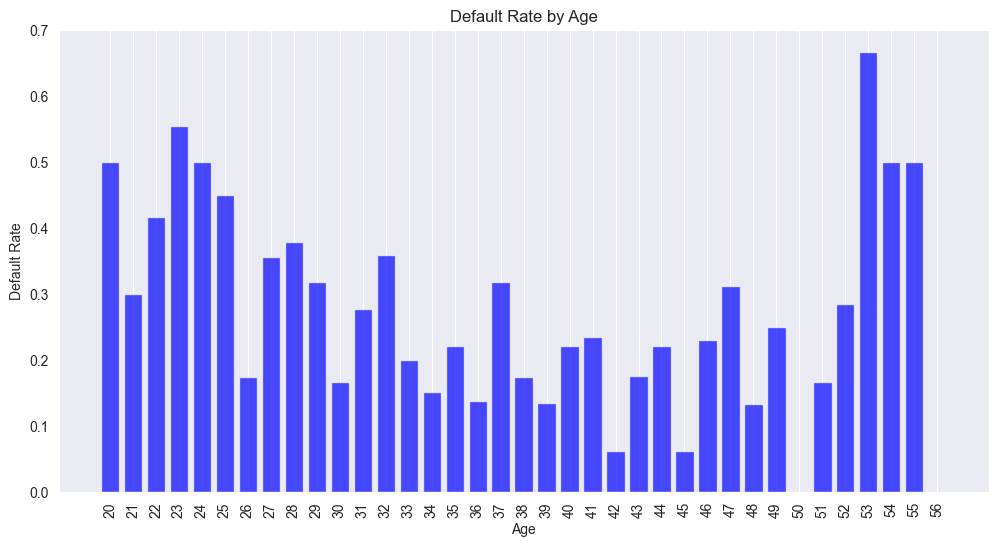

In [12]:
default_rate_by_age = df.groupby('age')['default'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(default_rate_by_age['age'], default_rate_by_age['default'], color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Default Rate')
plt.title('Default Rate by Age')
plt.xticks(default_rate_by_age['age'], rotation=90)
plt.grid(axis='y')
plt.show()

*Age most riskiest to loan based on debtinc column*

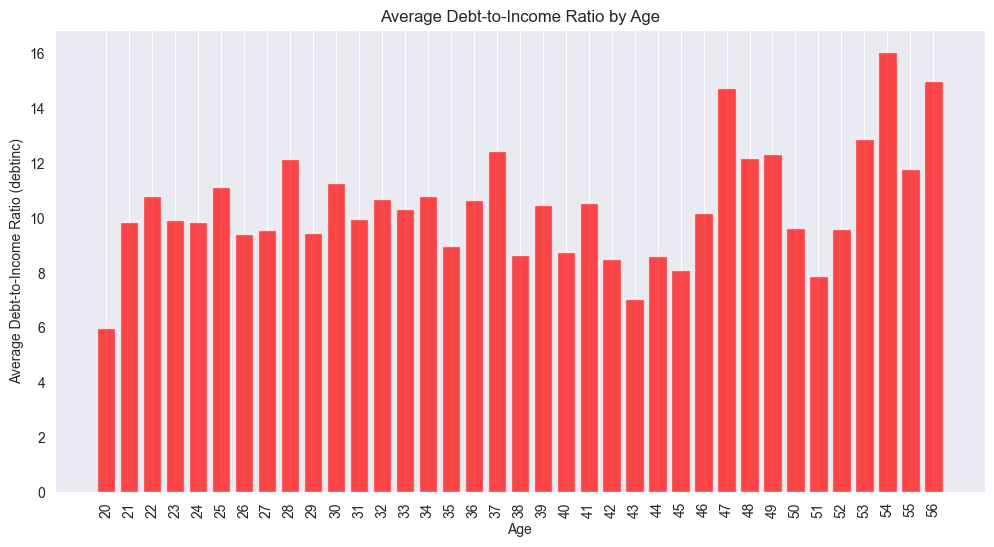

In [13]:
average_debtinc_by_age = df.groupby('age')['debtinc'].mean().reset_index()
average_debtinc_by_age = average_debtinc_by_age.sort_values(by='debtinc', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(average_debtinc_by_age['age'], average_debtinc_by_age['debtinc'], color='red', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Average Debt-to-Income Ratio (debtinc)')
plt.title('Average Debt-to-Income Ratio by Age')
plt.xticks(average_debtinc_by_age['age'], rotation=90)
plt.grid(axis='y')
plt.show()

for pie charT:

- `<30k`: This income range represents individuals with an income less than 30,000 dollars. The percentage of individuals falling into this category is approximately 32.3%.
- `30k-40k`: This income range represents individuals with an income between 30,000 and 40,000 dollars. The percentage of individuals falling into this category is approximately 20.2%.
- `40k-50k`: This income range represents individuals with an income between 40,000 and 50,000 dollars. The percentage of individuals falling into this category is approximately 29.9%.
- `>50k`: This income range represents individuals with an income greater than 50,000 dollars. The percentage of individuals falling into this category is approximately 17.6%.